
### Inference of Pre-trained Models on Jetson Nano

#### Why does VEX AI Robotics Competition (VAIRC) utilize pre-trained models for inference on the Jetson nano?



A pre-trained model refers to a model that has been trained on a large-scale dataset and is then used as a starting point for models targeting specific tasks.\
The core idea of pre-trained models is to enable the model to learn rich feature representations and knowledge through training on vast amounts of general data, and then fine-tune it based on these foundations to adapt to specific tasks.\
Advantages:\
Reduced Training Time: Pre-trained models have already been trained on vast amounts of data and possess good initial weights, therefore significantly reducing the training time for specific tasks.\
Improved Performance: As pre-trained models have learned rich feature representations and knowledge, they typically perform well on specific tasks.
Data Efficiency: For tasks with limited labeled data, pre-trained models can utilize the available data more effectively through transfer learning.\
Applications:\
Pre-trained models are widely used in areas such as natural language processing (NLP) and computer vision. Here are some common applications:\
Natural Language Processing: Pre-trained models like BERT, GPT-3, RoBERTa, etc., have demonstrated excellent performance in tasks such as text classification, sentiment analysis, machine translation, and text generation.\
Computer Vision: Pre-trained models like VGG, ResNet, Inception, etc., are widely applied in tasks like image classification, object detection, and image segmentation.\
Workflow:\
Pre-training: The model is trained on a large-scale unsupervised or weakly-supervised dataset to learn general feature representations. For example, training the BERT model on a large corpus of text data.\
Fine-tuning: The model is fine-tuned on labeled data for a specific task to adapt to that particular task. For instance, fine-tuning a pre-trained BERT model using data from a classification task.\
For example:\
ResNet (Residual Networks):\
Pre-training: The ResNet model is trained in a supervised manner on the ImageNet dataset, learning rich image feature representations.\
Fine-tuning: The pre-trained ResNet model is fine-tuned in a supervised manner for a specific image classification task.\
GPT (Generative Pre-trained Transformer) also incorporates the technique of pre-trained models.\
Pre-trained models are machine learning models that are trained on large-scale datasets and then applied to specific tasks. They offer significant advantages in terms of improving training efficiency, reducing computational resource consumption, and enhancing model performance. \
Through pre-training and fine-tuning, pre-trained models are able to achieve good performance on various tasks.\


Using external pre-trained models on the Jetson Nano edge computing device offers numerous advantages, particularly for efficient AI computing in resource-constrained environments. Here are some key benefits:\
Saving Training Time and Computational Resources:\
Pre-trained models have already undergone training on large-scale datasets, thus they can be directly used for inference tasks. This significantly reduces the need for training time and computational resources, making them suitable for low-power devices like the Jetson Nano.\
Efficient Real-time Processing:\
The Jetson Nano's GPU acceleration capabilities enable it to efficiently run deep learning models. By using pre-trained models, real-time processing can be achieved on edge devices for tasks such as video stream analysis, image classification, and object detection. Utilizing NVIDIA TensorRT for high-speed inference avoids the need to install development frameworks like PyTorch or TensorFlow, saving on computational resources.\
Reduced Data Requirement:
Pre-trained models have been trained on vast amounts of data and are able to generalize well. This means that for fine-tuning on specific tasks, only a small amount of specialized data is needed to achieve good performance, making them suitable for data-constrained application scenarios.
Flexible Model Deployment:\
Pre-trained models are often modular, allowing for pruning and optimization based on specific applications. This flexibility enables easier deployment on the Jetson Nano, allowing the adjustment of model size and complexity based on actual needs.
Enhanced Intelligence at the Edge:\
Using pre-trained models enables complex AI functionalities to be implemented on edge devices, such as intelligent surveillance, autonomous driving assistance, and robot navigation. This enhances the intelligence and autonomy of the devices.
Reduced Development Cost and Time:\
Pre-trained models provide high-quality baseline models that developers can fine-tune and optimize, significantly reducing development cost and time while improving development efficiency.\
Many pre-trained models (such as ResNet, MobileNet, YOLO, etc.) enjoy widespread community support and a wealth of resources (including open-source code, tutorials, documentation, etc.), making it easier for developers to get started and troubleshoot issues quickly.\
Optimized Performance and Energy Efficiency:\
Pre-trained models are carefully designed and optimized to achieve high performance with low energy consumption on low-power devices like the Jetson Nano. This extends the battery life of the devices.\
In summary, using external pre-trained models on the Jetson Nano edge computing device not only improves development efficiency and deployment flexibility but also enables efficient real-time AI computing in resource-constrained environments, bringing powerful intelligent functionalities to edge devices.\


As a reference material for VAIRC programmers, this technical topic discusses how to effectively run pre-trained models on the Jetson nano. It begins with training a working model on a regular personal computer (Windows, macOS) and then transferring it to the Jetson nano environment for operation.\
For readers unfamiliar with neural network programming and model training, this is a brief introduction and learning opportunity for these knowledge areas. The main goal of this topic is to ensure readers understand and successfully achieve the implementation of a trained model running on the Jetson nano.\
Fine-tuning an external pre-trained model for specific tasks involves more knowledge and programming skills in model development, which will be discussed in detail in the next topic.\


Regarding the utilization of external devices for training, ordinary personal computers, regardless of whether they are running Windows or macOS, can be used to train networks that will run on the Jetson nano, regardless of whether they have a GPU or not.\
Considering that it would greatly assist the reader's understanding if they can run the demonstrated programs concurrently with reading this document, this article is written in the form of a .ipynb file. Under the condition that the necessary runtime environment is configured, the reader can read and run the programs simultaneously, enhancing the efficiency and interest of learning.\
Previously mentioned, to run on a commonly used PC, appropriate configuration is required, including the installation of a program editor, Python compiler, and PyTorch runtime environment. \
The installation of the runtime environment is detailed in the "<windows安装anaconda和pytorch环境.md>" and "<macOS安装anaconda和pytorch环境.md>" files. Please refer to these guides for the development environment installation, or search online for alternative installation methods.\
Alternatively, TensorFlow can also be chosen as the development framework. While the two frameworks have different syntax rules and styles, they both operate within the Python environment, and the algorithmic essence is largely the same. They are both popular and mainstream development platforms today. Some possibly biased evaluations in the industry suggest that PyTorch is more intuitive and clear, making it friendly for beginners, which is why PyTorch is selected here.\
The programs introduced in this article need to be run in two separate environments (the training of the neural network model uses an external PC, while the model inference program runs on the Jetson nano platform). Red font will be used in the text to provide hints about the runtime environment, and we hope you will pay attention during the execution of the programs.\
Now, let's begin the narrative on the training program for handwritten digit recognition neural networks, using a combined approach of programming and explanation.


This article will use the training and inference of the classic handwritten digit recognition neural network (MNIST) from the history of neural network development as an example to introduce the methods of training deep learning neural networks. It will provide a brief overview for beginners without prior experience in neural network model training on the PyTorch development platform, explaining the process of running the training programs. However, it will not delve deeply into the Python and PyTorch programming rules and syntax explanations. If needed, please refer to other resources for further learning.


 </p>
 <span style="color: red;">Note: The following code segments are to be run on external devices (Windows, macOS computers) unless otherwise indicated.
 <span>

### 1.Training a Handwritten Digit Recognition Model(MNIST)

In [1]:

print('-------------训练开始')

-------------训练开始


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import torch.nn.functional as F


Importing necessary library functions:\
torch is the library function of PyTorch, and the PyTorch development framework supports the Python programming environment by calling the torch library functions.\
torchvision is a sub-library of PyTorch, used for processing image and video data.\
matplotlib is a 2D plotting library for Python, which provides a wide range of plotting tools that can be used in Python scripts, Jupyter notebooks, web application servers, and four graphical user interface toolkits. matplotlib is an open-source project based on Python.


In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu



Check if a GPU can be used. If the computer has GPU hardware installed and the GPU drivers are correctly installed, the program will automatically run in a GPU environment. Otherwise, the program will run in a CPU environment.

In [4]:
# 超参数
batch_size = 64
learning_rate = 0.01
num_epochs = 10


Hyperparameters are parameters that are set before the learning process begins, and their choice directly affects the performance and behavior of machine learning models. They need to be set by users or algorithm developers before the training process.\
Setting hyperparameters:

batch_size: In machine learning and deep learning, batch_size refers to the number of training samples used in one iteration during the training process. It is an important hyperparameter that has a direct impact on the training efficiency and effectiveness of the model.

learning_rate: In machine learning and deep learning, the learning rate is a crucial hyperparameter that controls the speed of updating the model's parameters during training. The value of the learning rate determines the magnitude of the change in parameters during each iteration. Specifically, the learning rate determines the size of the step taken in updating the weights during the gradient descent process.

num_epochs: In machine learning and deep learning, num_epochs (or the number of epochs) refers to the number of times the entire training dataset is traversed through for training. Understanding num_epochs is crucial for optimizing the training process and achieving good model performance.

In [5]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

在机器学习和图像处理中，需要对图像进行预处理，它使用了 PyTorch 的 transforms 模块。这里通过 transforms.Compose 创建了一个变换序列，这些变换会按顺序应用到图像数据上。具体来说，它包含了两个步骤：<br>
transforms.ToTensor()：这个变换将 PIL 图像或者 NumPy 数组转换成 PyTorch 张量。它会改变数据格式，从 H x W x C（高度 x 宽度 x 通道）变为 C x H x W（通道 x 高度 x 宽度），并且将数据类型从 uint8（取值范围是 0-255）转换为 float32（取值范围是 0.0-1.0）。这一步是数据准备的重要部分，因为 PyTorch 模型通常预期输入是张量形式。<br>
transforms.Normalize((0.5,), (0.5,))：这个变换进行数据标准化，使得输入数据的均值和标准差达到指定值。这里的参数 (0.5,) 为均值，(0.5,) 为标准差。由于传入的是单通道的灰度图像（只有一个通道），所以这里只有一个值。这种标准化有助于模型训练，因为它确保了不同的输入特征在相同的尺度上，有利于梯度下降算法更快更稳定地收敛。<br>
这种预处理流程是机器学习中常用的技术，特别是在处理图像时，可以帮助提高模型的性能和训练速度。<br>  

In machine learning and image processing, it is necessary to preprocess images, which often involves using the transforms module from PyTorch. A sequence of transformations is created using transforms.Compose, and these transformations are applied to the image data in order. Specifically, it consists of two steps:

transforms.ToTensor(): This transformation converts a PIL image or a NumPy array into a PyTorch tensor. It changes the data format from H x W x C (height x width x channels) to C x H x W (channels x height x width) and converts the data type from uint8 (values ranging from 0-255) to float32 (values ranging from 0.0-1.0). This step is an important part of data preparation as PyTorch models typically expect inputs in the form of tensors.

transforms.Normalize((0.5,), (0.5,)): This transformation normalizes the data to have a specified mean and standard deviation. Here, the parameters (0.5,) represent the mean, and (0.5,) represent the standard deviation. Since grayscale images with a single channel are being processed, there is only one value for each. This normalization helps with model training as it ensures that different input features are on the same scale, facilitating faster and more stable convergence of the gradient descent algorithm.

This preprocessing pipeline is a commonly used technique in machine learning, especially when dealing with images, and can help improve the model's performance and training speed.


 Before executing the next program, create two directories named "data" and "model" in the current directory. These directories will be used to store the downloaded training data and the trained network models.
</p> <span style="color: yellow;">Note: If the "data" and "model" directories do not exist, the program execution will encounter an error. <span>

In [6]:
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

<img src="./手写数字图像.png" alt="Example Plot" style="width: 50%; height: auto;">


The MNIST (Modified National Institute of Standards and Technology) dataset is a classic handwritten digit dataset widely used in research and education for machine learning and deep learning, often serving as an introductory training and testing resource for computer vision and machine learning. It contains 28x28 pixel grayscale images representing digits from 0 to 9. The MNIST dataset is divided into a training set and a test set, with the following specifics:\
Training set: 60,000 images\
Test set: 10,000 images\
Each image is a single-channel grayscale image with pixel values ranging from 0 to 255. Typically, when using the dataset, the pixel values are normalized to be between 0 and 1 or -1 and 1, as shown in the figure above.\
Here's a detailed explanation of the code that uses the PyTorch framework to load and prepare the MNIST dataset:\
Loading the Dataset
Creating the Dataset Object:\
The datasets.MNIST() function from the torchvision library is called to load the MNIST dataset.\
root='./data' specifies the local path where the data will be stored. If the data is not found in the specified path, it will be downloaded from the internet.\
train=True and train=False indicate whether to load the training set or the test set.\
transform=transform applies predefined transformations (such as converting to tensors and normalizing) that are applied to each image during data loading.\
download=True allows automatic data downloading from the internet if the data is not available locally.\
Creating the DataLoader\
Configuring the DataLoader:\
torch.utils.data.DataLoader() is used to create an iterable data loader, which enables batch-wise data loading during model training and testing.
dataset=train_dataset and dataset=test_dataset specify the source of the data.\
batch_size=batch_size is a hyperparameter that specifies the number of images loaded in each batch. This value affects the memory consumption and speed of model training.\
shuffle=True and shuffle=False determine whether the training dataset should be shuffled at the beginning of each training epoch. Shuffling the training data can help reduce model overfitting, while the test data is typically not shuffled.\
By setting these parameters, this code effectively prepares the data streams for training and testing, ensuring that the data is appropriately processed and batched before entering the model. Such a data processing pipeline is one of the crucial steps in implementing effective deep learning models.

In [7]:
# 定义模型
class ComplexNet(nn.Module):
    def __init__(self):
        super(ComplexNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)  # Input channels, Output channels, Kernel size
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)  # Kernel size, Stride
        self.fc1 = nn.Linear(64 * 7 * 7, 600)
        self.fc2 = nn.Linear(600, 120)
        self.fc3 = nn.Linear(120, 10)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)  # Flatten the tensor for the fully connected layer
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


This code defines a deep learning model called ComplexNet, built on the PyTorch framework. It is a convolutional neural network (CNN), commonly used for processing image data.\
Class Definition and Initialization\
ComplexNet inherits from nn.Module, which is the base class for all PyTorch neural networks.
In the __init__ method, the various layers of the network are defined. These layers include convolutional layers, pooling layers, fully connected layers (linear layers), and a Dropout layer.\
(I) Layer Composition\
Convolutional Layers\
self.conv1: The first convolutional layer uses a 3x3 convolution kernel with 1 input channel and 32 output channels. Padding of 1 is used to maintain the spatial size of the input and output.\
self.conv2: The second convolutional layer also uses a 3x3 convolution kernel, but with 32 input channels and 64 output channels, maintaining the same padding strategy.\
Pooling Layer\
self.pool: A max-pooling layer uses a 2x2 window to downsample the feature map, with a stride of 2. This helps reduce the spatial dimensions and number of parameters of the data, thereby controlling overfitting.\
Fully Connected Layers\
self.fc1: The first fully connected layer takes the flattened features from the convolutional layers, which are of size 6477, and outputs 600.\
self.fc2: The second fully connected layer further reduces the features from 600 dimensions to 120.\
self.fc3: The final fully connected layer reduces the features from 120 dimensions to 10, which typically represents the number of classes in a classification task.\
Dropout Layer\
self.dropout: The Dropout layer drops neurons with a probability of 0.25, a common technique to prevent overfitting.\
(II) Forward Propagation Method (forward)\
The forward method defines how data flows through these layers:\
Data first passes through the self.conv1 convolutional layer, followed by the ReLU activation function, and then through the pooling layer.\
After passing through the second convolutional layer self.conv2 and the ReLU activation, it goes through the pooling layer again.\
The pooled data needs to be flattened to serve as input for the fully connected layers.\
The flattened data passes through three fully connected layers (the first one with ReLU activation and Dropout, the second one with only ReLU activation), and finally, the final result is output through self.fc3.\
Such a network architecture is suitable for image classification tasks, capable of automatically learning useful features from raw pixels to make classification decisions.

In [8]:
#实例化网络并移动到设备上：
#创建了ComplexNet的一个实例，并将其移动到了之前检测到的设备上（GPU或CPU）。
model = ComplexNet().to(device)
print('model建立')

model建立


    
An instance of ComplexNet has been created and moved to the previously detected device (GPU or CPU).

In [9]:
# 损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)


This code defines two key components for training a neural network, which are commonly set up in the PyTorch framework.\
Loss Function:\
criterion = nn.CrossEntropyLoss()\
nn.CrossEntropyLoss() is the cross-entropy loss function in PyTorch used for classification problems. It combines nn.LogSoftmax() and nn.NLLLoss() (negative log-likelihood loss) into a single class. It is well-suited for multiclass classification problems where the classes are mutually exclusive. The loss function expects the model's output to be the raw, unnormalized scores (also known as logits), and the labels should be the class indices for each sample.\
Optimizer:\
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
optim.SGD is the implementation of Stochastic Gradient Descent, one of the most basic optimization algorithms.\
model.parameters() provides references to all the trainable parameters in the model, which will be updated by the optimizer. \
lr=learning_rate sets the learning rate, which is a crucial hyperparameter controlling the step size of the parameter updates. The size of the learning rate directly affects the speed and quality of the model parameter updates during training.\
These two components work together, enabling the model to adjust its parameters based on the loss computed by the loss function using each batch of data during the training loop. The goal is to improve the model's performance and gradually reduce the loss value. In a practical training loop, the data from each batch is used to calculate the loss, and then the optimizer updates the model weights.



  
这段代码涉及使用 Python 的 matplotlib 库来实时更新和显示训练过程中的损失和准确率图表。这是数据科学和机器学习中常用的做法，可以帮助开发者直观地了解模型的训练进展和性能。下面是对代码中每部分的具体解释：

实时交互模式
plt.ion()：
plt.ion() 开启 matplotlib 的交互模式。在这个模式下，plt.show() 命令不会阻塞代码的执行，允许图表在显示的同时继续运行更新。
这对于实时更新图表（如在训练过程中动态显示损失和准确率变化）非常有用。
初始化图表
损失图表 (fig_loss, ax_loss)：

fig_loss, ax_loss = plt.subplots() 创建一个新的图表和坐标轴用于绘制损失值。
fig_loss 是图表对象，可以用来对图表进行全局设置，如图表大小、标题等。
ax_loss 是对应的坐标轴对象，用来具体绘制和设置图表中的元素，如线条样式、坐标轴标签、图例等。
准确率图表 (fig_acc, ax_acc)：

fig_acc, ax_acc = plt.subplots() 创建另一个图表和坐标轴用于绘制准确率。
这允许损失和准确率分别在不同的窗口中实时更新，使得两者的变化趋势可以分别观察，避免在单一图表中信息过载。
使用这种方式，你可以在模型训练的每个周期（epoch）或每个批次（batch）结束后更新这些图表，展示最新的训练统计信息。这对于调试模型和调整训练参数非常有帮助，因为你可以即时看到修改参数对模型性能的影响  

In [10]:
# 训练和评估
train_losses = []
train_accuracies = []


Two lists, train_losses and train_accuracies, are initialized to store the loss and accuracy values for each iteration (typically each batch or epoch) during the model training process. This allows tracking and visualizing the performance changes during training, which is crucial for understanding and adjusting the model.

Epoch 1, Loss: 1.3946, Accuracy:0.5956
Epoch 2, Loss: 0.2565, Accuracy:0.9230
Epoch 3, Loss: 0.1503, Accuracy:0.9548
Epoch 4, Loss: 0.1098, Accuracy:0.9667
Epoch 5, Loss: 0.0881, Accuracy:0.9734


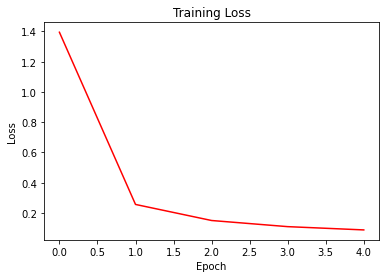

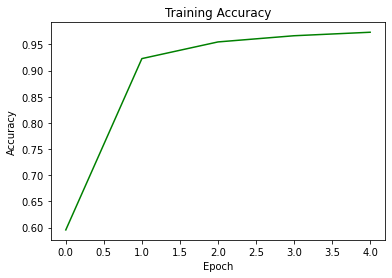

In [11]:
plt.ion()
# 初始化两个图表
fig_loss, ax_loss = plt.subplots()
fig_acc, ax_acc = plt.subplots()
with open('./model/training_log.txt', 'w') as f:
    num_epochs = 5
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct_predictions = 0
        total_predictions = 0

        for i, data in enumerate(train_loader, 0):
            inputs, labels = data[0].to(device), data[1].to(device)

            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
        #------------------------------------------
            _,predicted = torch.max(outputs.data,1)
            total_predictions += labels.size(0)
            correct_predictions += (predicted == labels).sum().item()
        #------------------------------------------

        epoch_loss = running_loss / len(train_loader)
        epoch_accuracy = correct_predictions/total_predictions
            # 保存checkpoint
        checkpoint = {
            #'name': 'VAIC-MNISTComplexNet',
            #'maker': 'Lichengtong ',
            'epoch': epoch + 1,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': running_loss / len(train_loader)
        }
        torch.save(checkpoint, f'./model/mnist_complex_net_checkpoint_epoch{epoch + 1}.pth')
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_accuracy)
        print(f'Epoch {epoch+1}, Loss: {epoch_loss:.4f}, Accuracy:{epoch_accuracy:.4f}')
        f.write(f'Epoch {epoch+1}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}\n')

        #更新图表并保存训练结果：
        #在每个epoch结束后，更新图表以显示最新的损失和准确率，并在训练结束后保存图表为图片文件。
        ax_loss.clear()
        ax_loss.plot(train_losses, 'r-', label='Loss')
        ax_loss.set_title('Training Loss')
        ax_loss.set_xlabel('Epoch')
        ax_loss.set_ylabel('Loss')
        fig_loss.canvas.draw()
        ax_acc.clear()
        ax_acc.plot(train_accuracies, 'g-', label='Accuracy')
        ax_acc.set_title('Training Accuracy')
        ax_acc.set_xlabel('Epoch')
        ax_acc.set_ylabel('Accuracy')
        fig_acc.canvas.draw()


This code snippet represents a training loop that incorporates model training and logging the training progress to a file.\
Let's break down each part and its functionality:\
File Logging\
Using with open('./model/training_log.txt', 'w') as f opens a file for writing the logs from the training process. This approach ensures that the file is properly closed once the code block is executed.\
Training Process\
num_epochs = 5 sets the number of training epochs to 5, which is a hyperparameter that can be adjusted before the training starts.\
for epoch in range(num_epochs): initiates a loop, where each iteration represents one complete training epoch.
Within each epoch:\
running_loss = 0.0 initializes the cumulative loss.\
correct_predictions = 0 and total_predictions = 0 initialize counters for calculating accuracy.\
For each batch:\
for i, data in enumerate(train_loader, 0): iterates through the data batches from train_loader.\
inputs, labels = data[0].to(device), data[1].to(device) transfers the inputs and labels to the computational device (such as a GPU).\
optimizer.zero_grad() clears previous gradient information.\
outputs = model(inputs) obtains the model's output for the current batch.\
loss = criterion(outputs, labels) calculates the loss.\
loss.backward() performs backpropagation.\
optimizer.step() updates the model's parameters based on the gradients.\
running_loss += loss.item() accumulates the loss to compute the average loss.\
_, predicted = torch.max(outputs.data, 1) retrieves the predicted results.\
total_predictions += labels.size(0) updates the total number of predictions.\
correct_predictions += (predicted == labels).sum().item() updates the number of correct predictions.\
Calculating and Logging Results:\
epoch_loss = running_loss / len(train_loader) calculates the average loss for the current epoch.\
epoch_accuracy = correct_predictions / total_predictions calculates the accuracy for the current epoch.\
torch.save(checkpoint, f'./model/mnist_complex_net_checkpoint_epoch{epoch + 1}.pth') Here, the torch.save() function is used to save the checkpoint dictionary to disk. The file path and name are dynamically generated using f-string (a feature introduced in Python 3.6+), which includes the epoch number. This way, the checkpoint for each epoch is saved as a separate file, with the epoch number included in the filename, making it easy to find and load a specific checkpoint in the future.\
train_losses.append(epoch_loss) and train_accuracies.append(epoch_accuracy) record the loss and accuracy, respectively.\
The code provides a comprehensive demonstration of the basic steps involved in training a neural network using PyTorch, including data processing, model training, loss computation, backpropagation, parameter updates, result calculation, and logging. By recording the logs to a file, you can easily track the detailed performance changes during training, which is very helpful for debugging and improving the model.


Using the Python's matplotlib library within a training loop to update and display real-time charts of the training loss and accuracy is a common practice in data science and machine learning. It allows developers to visually understand the model's training progress and performance. Here is a detailed explanation of each part:\
Interactive Mode\
plt.ion():\
plt.ion() enables matplotlib's interactive mode. In this mode, the plt.show() command will not block the execution of the code, allowing the chart to be displayed while continuing to run and update.\
This is useful for updating charts dynamically, such as displaying the changing loss and accuracy during training.\
Chart Initialization\
Loss Chart (fig_loss, ax_loss):\
fig_loss, ax_loss = plt.subplots() creates a new figure and axes for plotting the loss values.\
fig_loss is the figure object that allows global settings on the figure, such as its size and title.\
ax_loss is the corresponding axes object that is used to specifically plot and set elements in the figure, such as line styles, axis labels, and legends.\
Accuracy Chart (fig_acc, ax_acc):\
fig_acc, ax_acc = plt.subplots() creates another figure and axes for plotting the accuracy.\
This allows the loss and accuracy to be updated separately in different windows, enabling the trends of both to be observed independently, avoiding information overload in a single chart.\
Using this approach, you can update these charts after each training epoch or batch, showing the latest training statistics. This is helpful for debugging the model and adjusting training parameters as you can immediately see the impact of parameter changes on the model's performance.\
Dynamically Updating the Charts for Training Loss and Accuracy After Each Epoch\
After each training epoch, you can update the charts to reflect the latest training loss and accuracy. This provides a visual representation of the model's learning progress and performance changes.\
Saving the Charts as Image Files After the Entire Training Process\
It is also a useful practice to save these charts as image files after the entire training process is complete. This allows you to keep a record of the model's training progress and compare it with future runs or experiments.\
The process of visualizing the model's learning progress and performance changes through charts is invaluable as it provides insights into how the model is behaving and how it can be further improved.\
Updating Charts\
At the end of each training epoch, the charts are updated to reflect the latest training loss and accuracy. The specific steps include:\
Clearing Old Chart Content: Use ax_loss.clear() and ax_acc.clear() to remove previous chart content. This is done to remove old data points before plotting new ones.\
Plotting New Data:\
For the loss chart: Use ax_loss.plot(train_losses, 'r-', label='Loss') to plot the loss data, where 'r-' specifies the line color and style (red solid line).\
For the accuracy chart: Use ax_acc.plot(train_accuracies, 'g-', label='Accuracy') to plot the accuracy data, where 'g-' specifies the line color and style (green solid line).\
Setting Chart Titles and Axis Labels:\
Set the title, X-axis, and Y-axis labels for the loss chart.\
Do the same for the accuracy chart.\
Redrawing the Charts: Use fig_loss.canvas.draw() and fig_acc.canvas.draw() to trigger a redraw of the charts, making the updated data visible on the charts.\
Saving Charts as Image Files\
After the entire training process is complete, you can save these charts as image files using fig_loss.savefig('training_loss.png') and fig_acc.savefig('training_accuracy.png'). \
This allows you to document the training results and facilitates subsequent analysis and reporting.\
Note that the code lines to save the image files should be executed after all training epochs are completed, typically outside the training loop.\
By doing this, you can ensure that the results of each training session are effectively recorded and visualized, which is an essential tool for evaluating and comparing model performance.


In [24]:
plt.ioff()
plt.show()
#保存图
fig_loss.savefig('fig_loss.png')
fig_acc.savefig('fig_acc.png')

------------show2
----------



Turning Off Interactive Mode with plt.ioff():\
This turns off the interactive mode of matplotlib. The interactive mode (enabled with plt.ion()) allows charts to be updated in real-time during training without blocking the program's execution. Once training is complete and there is no need for real-time updates, you can turn off the interactive mode to prepare for final display or saving static images.\
Displaying Charts:\
plt.show(): This command is used to display all active matplotlib figure windows. It is typically used in non-interactive mode to present the graphical interface after the program has finished executing. When the interactive mode is off, using this command ensures that users have an opportunity to view the final charts.\
Saving Charts as Images:\
fig_loss.savefig('fig_loss.png') and fig_acc.savefig('fig_acc.png'): These two lines of code save the training loss chart and training accuracy chart as PNG image files, respectively. This is a very useful feature because it allows you to keep a record of the charts for reporting or further analysis.\
'fig_loss.png' and 'fig_acc.png' are the file save paths and names. You can modify these parameters according to your needs to save in different locations or use different file names.\
By doing this, you can not only view the performance changes during training on the screen, but also have a permanent record, which is very helpful for subsequent evaluation and comparison.

In [25]:

print('----------训练结束')】

----------end



### II. Verification of the Recognition Functionality of the Handwritten Digit Recognition Model
Here, readers are encouraged to test the recognition performance of the trained model. They can appropriately modify the network structure of the model (by increasing or decreasing the number of layers, neurons, etc.) and test the changes in recognition performance after training. AI tools such as GPT-4 or Copilot can also be utilized to assist in modifying the program.

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import torch.nn.functional as F

import numpy as np

# 设置随机种子以确保结果可复现
torch.manual_seed(0)
np.random.seed(0)

# 定义模型
class ComplexNet(nn.Module):
    def __init__(self):
        super(ComplexNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)  # Input channels, Output channels, Kernel size
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)  # Kernel size, Stride
        self.fc1 = nn.Linear(64 * 7 * 7, 600)
        self.fc2 = nn.Linear(600, 120)
        self.fc3 = nn.Linear(120, 10)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)  # Flatten the tensor for the fully connected layer
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# 检查是否有可用的GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 实例化模型
model = ComplexNet().to(device)
print('model建立')

model建立


If this code is identical to the part where the model's network structure is defined during training, it does not need to be executed again if you are validating the model immediately after training.


In [ ]:

# 加载训练好的模型参数，只加载 model_state_dict 部分
checkpoint = torch.load('./model/mnist_complex_net_checkpoint_epoch50.pth')
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()  # 设置为评估模式

# 定义数据预处理
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# 加载测试数据
test_size = 100
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=test_size, shuffle=False)
# 获取一个批次的数据
data, target = next(iter(test_loader))

# 将数据输入模型进行推理
data = data.to(device)
output = model(data)
pred = output.argmax(dim=1, keepdim=True)

# 计算推理错误的个数并记录错误的行列位置
incorrect = (pred.cpu() != target.view_as(pred)).sum().item()
incorrect_indices = (pred.cpu() != target.view_as(pred)).nonzero(as_tuple=True)[0]

print(f'推理错误的个数: {incorrect} / 100')

# 设置显示样本的网格
fig, axs = plt.subplots(10, 10, figsize=(15, 15))
axs = axs.flatten()

# 显示每个样本及其预测结果
for i in range(test_size):
    axs[i].imshow(data[i].cpu().numpy().squeeze(), cmap='gray')
    title = f'Pred: {pred[i].item()}\nTrue: {target[i].item()}'
    if i in incorrect_indices:
        row, col = divmod(i, 10)
        title += f'\nError: ({row}, {col})'
    axs[i].set_title(title)
    axs[i].axis('off')

plt.tight_layout()
plt.show()

# 显示推理错误的图像
if incorrect > 0:
    rows = (incorrect // 10) + (1 if incorrect % 10 != 0 else 0)
    fig_error, axs_error = plt.subplots(rows, 10, figsize=(15, 3 * rows))
    axs_error = axs_error.flatten()

    for idx, error_idx in enumerate(incorrect_indices):
        axs_error[idx].imshow(data[error_idx].cpu().numpy().squeeze(), cmap='gray')
        row, col = divmod(error_idx.item(), 10)
        axs_error[idx].set_title(f'Pred: {pred[error_idx].item()}\nTrue: {target[error_idx].item()}\n({row}, {col})')
        axs_error[idx].axis('off')

    for ax in axs_error[incorrect:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()


This code is primarily used to load a trained model and perform inference (i.e., predictions) on the MNIST dataset. It then displays a portion of the prediction results, highlighting those images that were incorrectly predicted. Here is a detailed explanation of the code:\
Loading the trained model parameters:\ 
Defining data preprocessing:\
Uses transforms.Compose to define a series of data preprocessing steps, including converting the data to PyTorch tensors (ToTensor) and normalizing the data (Normalize).\
Loading the test data:\
Uses datasets.MNIST (or a similar function/class) to load the MNIST test dataset.\
Creates a data loader (DataLoader) with a specified batch_size (e.g., batch_size=100), which means that 100 samples will be loaded for testing at a time. \
Note that for the entire MNIST test set, which contains 10,000 images, multiple batches would typically be used, but for simplicity, the code might assume a small batch_size or process the entire set as a single batch.\
Gets the first batch of data using next(iter(test_loader)). In the case where the batch_size is set to the size of the entire test set, this will retrieve the only batch.\
Model inference:\
Moves the loaded data to the appropriate device (e.g., CPU or GPU) using the device-specific functions or methods (e.g., data.to(device)).
Performs inference on the loaded data using the loaded model. This typically involves passing the data through the model to obtain 

Using a model for inference on input data involves several steps:\
Finding the Predicted Class for Each Sample:\
Apply the argmax method to find the index of the maximum predicted probability for each sample, which represents the predicted class.
Calculating the Number of Incorrect Predictions:\
Compare the predictions with the true labels to calculate the number of incorrect predictions.\
Identifying Indices of Incorrect Predictions:\
Use the nonzero method to find the indices of the samples where the predictions were incorrect.\
Displaying Samples and Their Predictions:\
Use plt.subplots to create a 10x10 grid for displaying samples.\
For each sample, use imshow to display the image and set_title to set the title, which includes the predicted class and the true label.
If the prediction for a sample is incorrect, include an additional indication of the error in the title.\
Displaying Images with Incorrect Predictions:\
If there are samples with incorrect predictions, create a new grid to display these incorrect samples.\
Similarly, use imshow to display the images and set_title to set the title, which includes the predicted class, the true label, and an indication of the error.\
In summary, this code provides a complete workflow from loading a model to performing inference on a test set and visualizing the prediction results, both correct and incorrect. This helps users intuitively understand the model's performance and identify potential error patterns.

### III. Converting a Network from .pth Format to .onnx Format

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import torch.nn.functional as F
import numpy as np

These import statements include libraries for defining and training neural networks (such as torch and torchvision), as well as libraries for data processing and visualization (such as numpy and matplotlib).

In [22]:

class ComplexNet(nn.Module):
    def __init__(self):
        super(ComplexNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)  # Input channels, Output channels, Kernel size
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)  # Kernel size, Stride
        self.fc1 = nn.Linear(64 * 7 * 7, 600)
        self.fc2 = nn.Linear(600, 120)
        self.fc3 = nn.Linear(120, 10)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)  # Flatten the tensor for the fully connected layer
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

定义了一个卷积神经网络类 ComplexNet。这个网络包含两个卷积层、一个最大池化层和三个全连接层。每个卷积层后面都跟着一个ReLU激活函数和一个池化层。全连接层中间插入了一个Dropout层，以减少过拟合。<br>
此网络定义与训练时网络结构相同。<br>
A convolutional neural network class named ComplexNet has been defined. This network consists of two convolutional layers, a max pooling layer, and three fully connected layers. Each convolutional layer is followed by a ReLU activation function and a pooling layer. A Dropout layer is inserted between the fully connected layers to reduce overfitting.\
The network definition is identical to the network structure used during training.

In [23]:
# 检查是否有可用的GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Check if a GPU is available, and if so, use the GPU; otherwise, use the CPU.

In [24]:
# 实例化模型
model = ComplexNet().to(device)
print('model建立---')

model建立---


Instantiate the ComplexNet model, ensuring that it is consistent with the model structure used during training, and move it to the device (CPU or GPU).

In [28]:
# 加载训练好的模型参数，只加载 model_state_dict 部分
checkpoint_path = './model/mnist_complex_net_checkpoint_epoch5.pth'
checkpoint = torch.load(checkpoint_path, map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])

# 打印 checkpoint 的所有键
print("Checkpoint keys:", checkpoint.keys())

# 打印模型的权重（仅打印部分权重示例）
print("Model weights:")
for name, param in model.named_parameters():
    if 'weight' in name:
        print(f"{name}: {param.data.shape}")

Checkpoint keys: dict_keys(['epoch', 'model_state_dict', 'optimizer_state_dict', 'loss'])
Model weights:
conv1.weight: torch.Size([32, 1, 3, 3])
conv2.weight: torch.Size([64, 32, 3, 3])
fc1.weight: torch.Size([600, 3136])
fc2.weight: torch.Size([120, 600])
fc3.weight: torch.Size([10, 120])


Load the trained model parameters from the .pth file and populate the model with them.\
Print all the keys in the checkpoint file and some weight information to verify that the loading was successful.

In [29]:
# 导出为 ONNX 格式
dummy_input = torch.randn(1, 1, 28, 28).to(device)  # MNIST 输入尺寸
onnx_path = './model/mnist_complex_net_li.onnx'
torch.onnx.export(
    model,
    dummy_input,
    onnx_path,
    input_names=['input'],
    output_names=['output'],
    dynamic_axes={'input': {0: 'batch_size'}, 'output': {0: 'batch_size'}}
)

print(f"Model has been exported to ONNX format at {onnx_path}.")

Model has been exported to ONNX format at ./model/mnist_complex_net_li.onnx.


Use torch.onnx.export to export the model to ONNX format, specifying the names of the input and output tensors as well as the dynamic axes to support different batch sizes.

### IV. Performing Inference Using TensorRT on a Jetson Nano




</p> <span style="color: red;">Note: Please run the following program segment on a Jetson Nano edge computing device.\
<span> 
</p> <span style="color: yellow;">Before executing the next program segment, create two new directories named "data" and "model" in the current directory. Copy the trained and converted .onnx file from an external device to the "model" directory. <br>
Optionally, you can also copy the training data from an external device to the "data" directory to avoid having to re-download it during the Jetson's runtime.<span>

In [ ]:
import tensorrt as trt
import pycuda.driver as cuda
import pycuda.autoinit
import numpy as np
import struct
import matplotlib.pyplot as plt

In [ ]:
# TensorRT 日志记录器
TRT_LOGGER = trt.Logger(trt.Logger.WARNING)

# ONNX 模型路径
onnx_model_path = './model/mnist_complex_net.onnx'
engine_path = './model/mnist_complex_net.trt'

# 将 ONNX 模型转换为 TensorRT 引擎
def build_engine(onnx_file_path, engine_file_path):
    with trt.Builder(TRT_LOGGER) as builder, builder.create_network(1 << int(trt.NetworkDefinitionCreationFlag.EXPLICIT_BATCH)) as network, trt.OnnxParser(network, TRT_LOGGER) as parser:
        builder.max_workspace_size = 1 << 30  # 1GB
        builder.max_batch_size = 1
        if not parser.parse_from_file(onnx_file_path):
            for error in range(parser.num_errors):
                print(parser.get_error(error))
            return None
        with builder.build_cuda_engine(network) as engine:
            with open(engine_file_path, "wb") as f:
                f.write(engine.serialize())
            return engine

# 构建引擎
engine = build_engine(onnx_model_path, engine_path)

这段代码定义了一个函数 build_engine，用于从 ONNX 模型文件构建 TensorRT 引擎。TensorRT 是 NVIDIA 提供的一个用于高性能深度学习推理（inference）的库。以下是代码的逐步解释：
函数定义:
def build_engine(onnx_file_path, engine_file_path):
定义了一个函数 build_engine，它接受两个参数：
onnx_file_path：ONNX 模型的文件路径。
engine_file_path：TensorRT 引擎将要保存的文件路径。
TensorRT 初始化:
with trt.Builder(TRT_LOGGER) as builder, ...:
这里使用 with 语句来确保 TensorRT 的资源（如 builder 和 network）在使用完毕后被正确释放。trt.Builder 是 TensorRT 的一个类，用于构建引擎。TRT_LOGGER 是一个日志记录器，用于记录 TensorRT 生成的日志。
同时，代码创建了一个 network 对象，该对象用于定义网络的拓扑结构。这里使用了 EXPLICIT_BATCH 标志，意味着网络将显式地处理批处理大小。
接下来，创建了一个 OnnxParser 对象，用于从 ONNX 模型文件中解析网络结构。
1. 设置 TensorRT 参数:
builder.max_workspace_size = 1 << 30  # 1GB  
builder.max_batch_size = 1

Here is the translation of the provided code explanation into English, along with a slight modification to include the actual code snippet for clarity:\
Function Definition:\
def build_engine(onnx_file_path, engine_file_path):\
This defines a function called build_engine that takes two parameters:\
onnx_file_path: The file path of the ONNX model.\
engine_file_path: The file path where the TensorRT engine will be saved.\
TensorRT Initialization:\
with trt.Builder(TRT_LOGGER) as builder, builder.create_network(1 << int(trt.NetworkDefinitionCreationFlag.EXPLICIT_BATCH)) as network, trt.OnnxParser(builder, network, TRT_LOGGER) as parser:\
Here, the with statement is used to ensure that TensorRT resources (such as the builder and network) are properly released after use. trt.Builder is a class from TensorRT used to build engines. TRT_LOGGER is a logger for recording TensorRT-generated logs.
Simultaneously, a network object is created, which defines the topology of the network. The EXPLICIT_BATCH flag is set, meaning that the network will explicitly handle batch sizes.
An OnnxParser object is also created, which is used to parse the network structure from the ONNX model file.
Setting TensorRT Parameters:
builder.max_workspace_size = 1 << 30  # 1GB  
builder.max_batch_size = 1
These lines set the TensorRT parameters:
builder.max_workspace_size is set to 1GB (1 << 30, which is equivalent to 2 raised to the power of 30, or 1,073,741,824 bytes). This is the maximum GPU memory that TensorRT is allowed to use for workspace during engine building and execution.
builder.max_batch_size is set to 1, indicating that the engine will only support a batch size of 1.
The max_workspace_size sets the maximum amount of GPU memory that TensorRT can use when executing the network (here it's 1GB).\
The max_batch_size sets the maximum batch size for the engine (here it's \
1).Parsing the ONNX model:\
if not parser.parse_from_file(onnx_file_path):\
    ...\
Using the parse_from_file method of the OnnxParser to parse the model from the specified ONNX file path. If parsing fails, it prints out the error from the parser.\
2）Building the TensorRT engine:\
with builder.build_cuda_engine(network) as engine:  \
    ...\
Using the build_cuda_engine method of the builder to construct a CUDA engine from the previously defined network.\
3）Saving and returning the engine:\
with open(engine_file_path, "wb") as f:  \
    f.write(engine.serialize())  \
return engine\
Serializing the constructed engine into byte data and saving it to the specified file path. Additionally, the engine object is returned for further use if needed.\
Function call:\
engine = build_engine(onnx_model_path, engine_path)\
By providing the path to the ONNX model and the path to save the engine, the build_engine function is called to construct a TensorRT engine.\
In summary, the purpose of this code is to build a TensorRT engine from an ONNX model file, and save the engine to a specified file path.

In [ ]:
# 定义数据集路径（假设是MNIST数据集）
mnist_image_path = './data/MNIST/raw/t10k-images-idx3-ubyte'
mnist_label_path = './data/MNIST/raw/t10k-labels-idx1-ubyte'

# 读取 MNIST 数据集
def load_mnist_images(filename):
    with open(filename, 'rb') as f:
        magic, num, rows, cols = struct.unpack(">IIII", f.read(16))
        images = np.fromfile(f, dtype=np.uint8).reshape(num, 1, rows, cols)
    return images

def load_mnist_labels(filename):
    with open(filename, 'rb') as f:
        magic, num = struct.unpack(">II", f.read(8))
        labels = np.fromfile(f, dtype=np.uint8)
    return labels

# 加载图像和标签
images = load_mnist_images(mnist_image_path)
labels = load_mnist_labels(mnist_label_path)

# 选择若干图像进行推理（例如前10个）
num_images = 10
selected_images = images[:num_images]
selected_labels = labels[:num_images]

# 预处理图像
def preprocess_image(image):
    image = image.astype(np.float32)
    image /= 255.0  # 归一化
    return image


The preparation of inference data, including reading and normalization, is the same as that of test data in the validation phase on external computing devices. There is no need to elaborate on this here.

In [ ]:


# 加载 TensorRT 引擎
def load_engine(engine_file_path):
    with open(engine_file_path, "rb") as f, trt.Runtime(TRT_LOGGER) as runtime:
        return runtime.deserialize_cuda_engine(f.read())

engine = load_engine(engine_path)
context = engine.create_execution_context()

# 准备输入和输出缓冲区
input_shape = (1, 1, 28, 28)
output_shape = (1, 10)  # 假设是10个类别的分类
input_data = np.zeros(input_shape, dtype=np.float32)
output_data = np.empty(output_shape, dtype=np.float32)

d_input = cuda.mem_alloc(input_data.nbytes)
d_output = cuda.mem_alloc(output_data.nbytes)
bindings = [int(d_input), int(d_output)]

# 推理并显示结果
for i in range(num_images):
    image = preprocess_image(selected_images[i])
    cuda.memcpy_htod(d_input, image)

    # 进行推理
    context.execute_v2(bindings)

    cuda.memcpy_dtoh(output_data, d_output)
    predicted_label = np.argmax(output_data)
    true_label = selected_labels[i]

    # 显示图像和推理结果
    plt.imshow(image[0], cmap='gray')
    plt.title(f'Predicted: {predicted_label}, True: {true_label}')
    plt.axis('off')
    plt.show()

这段代码的主要目的是使用TensorRT来加载一个预先序列化的TensorRT引擎，并使用该引擎对MNIST数据集中的图像进行推理。下面是对该代码的逐行解释：
加载 TensorRT 引擎：

def load_engine(engine_file_path):  
    with open(engine_file_path, "rb") as f, trt.Runtime(TRT_LOGGER) as runtime:  
        return runtime.deserialize_cuda_engine(f.read())
这定义了一个函数load_engine，它打开一个包含TensorRT引擎的文件，并使用TensorRT运行时（trt.Runtime）反序列化该文件以加载引擎。这里假设trt是TensorRT库的别名，并且TRT_LOGGER是一个已定义的日志记录器。
加载引擎并创建执行上下文：

engine = load_engine(engine_path)  
context = engine.create_execution_context()
这两行代码首先调用load_engine函数来加载TensorRT引擎，然后为该引擎创建一个执行上下文。
准备输入和输出缓冲区：
The main purpose of this code is to use TensorRT to load a pre-serialized TensorRT engine and use this engine to perform inference on images from the MNIST dataset. Below is a line-by-line explanation of the code:\

Loading the TensorRT Engine:\
def load_engine(engine_file_path):  \
    with open(engine_file_path, "rb") as f, trt.Runtime(TRT_LOGGER) as runtime:  \
        return runtime.deserialize_cuda_engine(f.read())\
This defines a function load_engine that opens a file containing the TensorRT engine and uses the TensorRT runtime (trt.Runtime) to deserialize the file to load the engine. Here, it is assumed that trt is an alias for the TensorRT library and TRT_LOGGER is a pre-defined logger.\

Loading the Engine and Creating an Execution Context:\
engine = load_engine(engine_path)  \
context = engine.create_execution_context()\
These two lines of code first call the load_engine function to load the TensorRT engine and then create an execution context for the engine.\

Preparing Input and Output Buffers:\

input_shape = (1, 1, 28, 28)  
output_shape = (1, 10)  # 假设是10个类别的分类  
input_data = np.zeros(input_shape, dtype=np.float32)  
output_data = np.empty(output_shape, dtype=np.float32)
这里定义了输入和输出的形状，并初始化了对应的NumPy数组。input_data用于存储输入图像数据，而output_data用于存储推理结果。
分配CUDA设备内存并设置绑定：
d_input = cuda.mem_alloc(input_data.nbytes)  
d_output = cuda.mem_alloc(output_data.nbytes)  
bindings = [int(d_input), int(d_output)]
这里使用CUDA库（假设cuda是CUDA库的别名）为输入和输出数据分配设备内存。然后，创建一个绑定列表，该列表将主机内存（input_data和output_data）与设备内存（d_input和d_output）关联起来。
推理并显示结果：

input_shape = (1, 1, 28, 28)  \
output_shape = (1, 10)  # Assume it is a classification with 10 categories  \
input_data = np.zeros(input_shape, dtype=np.float32)  \
output_data = np.empty(output_shape, dtype=np.float32)\
Here, the shapes of the input and output are defined, and the corresponding NumPy arrays are initialized. input_data is used to store the input image data, while output_data is used to store the inference results.\

Allocating CUDA Device Memory and Setting Bindings:\

d_input = cuda.mem_alloc(input_data.nbytes)  \
d_output = cuda.mem_alloc(output_data.nbytes)  \
bindings = [int(d_input), int(d_output)]\
Here, the CUDA library (assuming cuda is an alias for the CUDA library) is used to allocate device memory for the input and output data. \Then, a binding list is created to associate host memory (input_data and output_data) with device memory (d_input and d_output).\

Inference and Displaying Results:\

for i in range(num_images):  
    image = preprocess_image(selected_images[i])  
    cuda.memcpy_htod(d_input, image)  
  
    # 进行推理  
    context.execute_v2(bindings)  
  
    cuda.memcpy_dtoh(output_data, d_output)  
    predicted_label = np.argmax(output_data)  
    true_label = selected_labels[i]  
  
    # 显示图像和推理结果  
    plt.imshow(image[0], cmap='gray')  
    plt.title(f'Predicted: {predicted_label}, True: {true_label}')  
    plt.axis('off')  
    plt.show()

This loop iterates over the selected number of images (num_images). \
For each image, it first performs preprocessing, then copies the preprocessed image from host memory to device memory. \
Next, it uses the TensorRT execution context to perform inference on the image.\
After inference is completed, it copies the results from device memory back to host memory and finds the category with the highest predicted probability as the predicted label. Finally, it uses the Matplotlib library (assuming plt is an alias for Matplotlib) to display the original image and the inference result.\
Note: In a real application, it may be necessary to handle various errors and exceptions, as well as optimize performance (e.g., by processing images in batches or using streams to overlap data transfer and computation). \
Additionally, it is essential to ensure that the CUDA and TensorRT libraries are correctly installed and that all imports and dependencies in the code are satisfied.\